***Bank Term Deposit Marketing***

<b style="color: MediumBlue;">Bank marketing</b> is known for its nature of developing a unique brand image, which is treated as the capital reputation of the financial academy. It is very important for a bank to develop good relationship with valued customers accompanied by innovative ideas which can be used as measures to meet their requirements.


<b>Business goal:</b> Reducing marketing resources by identifying customers who would subscribe to term deposit and thereby direct marketing efforts to them.

In [1]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)
df = pd.read_csv(r"/kaggle/input/bank-marketing-dataset/bank.csv")
df.rename(columns={'y':'Deposit'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:white;
            font-size:130%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:black;
               border:black;
               border-width:0px;
               border-style:solid;
              font-family: Times New Roman;
              text-align:left;'>
         Data Information 
    </h3>
    </div>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


The dataset has the following attributes:

1.  age (numeric)
2.  job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3.  marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
4.  education (categorical: "unknown","secondary","primary","tertiary")
5.  default: has credit in default? (binary: "yes","no")
6.  balance: average yearly balance, in euros (numeric)
7.  housing: has housing loan? (binary: "yes","no")
8.  loan: has personal loan? (binary: "yes","no")
9.  contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")

<b>Target Variable:</b>

17. y : has the client subscribed to a term deposit?(binary: "yes","no")


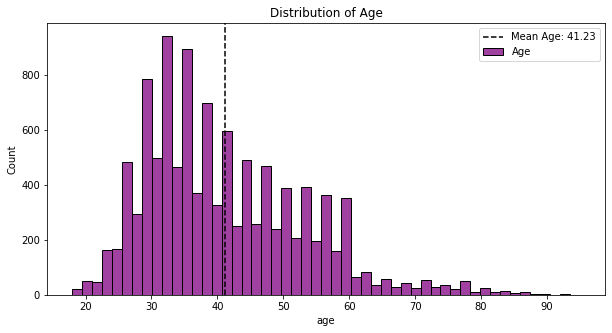

In [3]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['age'],label='Age',color='purple')
plt.axvline(x=df['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(df['age'].mean(),2)))
plt.legend()

plt.title('Distribution of Age')
plt.show()

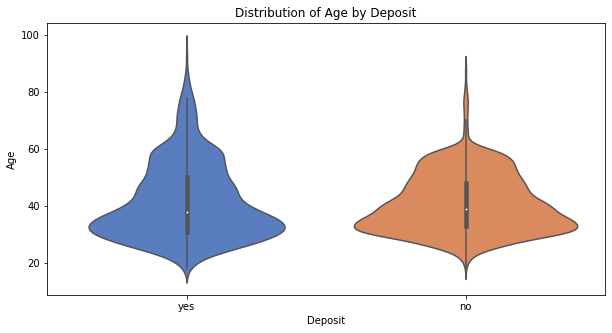

In [4]:
plt.figure(figsize=(10, 5))

# Violin plot
sns.violinplot(x='deposit', y='age', data=df, palette='muted')

# Adding title and labels
plt.title('Distribution of Age by Deposit')
plt.xlabel('Deposit')
plt.ylabel('Age')

plt.show()

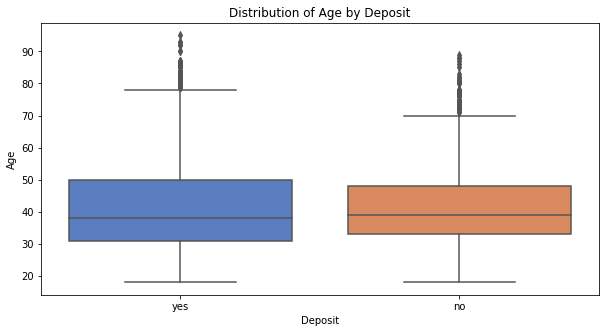

In [5]:
plt.figure(figsize=(10, 5))

# Box plot
sns.boxplot(x='deposit', y='age', data=df, palette='muted')

# Adding title and labels
plt.title('Distribution of Age by Deposit')
plt.xlabel('Deposit')
plt.ylabel('Age')

plt.show()

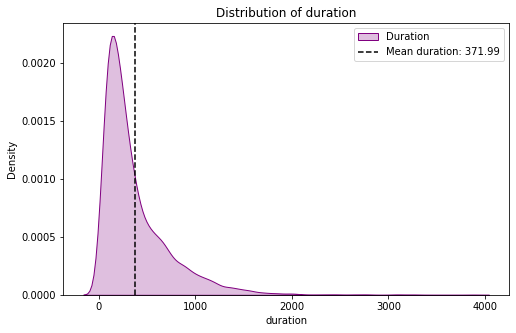

In [6]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['duration'],shade=True,color='purple',label='Duration')
plt.axvline(x=df['duration'].mean(),color='k',linestyle ="--",label='Mean duration: {}'.format(round(df['duration'].mean(),2)))
plt.legend()
plt.title('Distribution of duration')
plt.show()

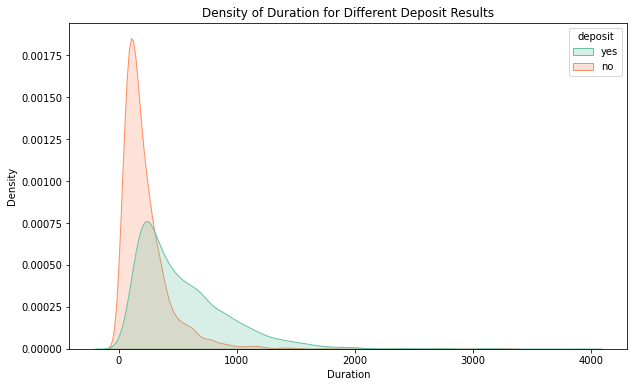

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create the KDE plot
sns.kdeplot(data=df, x='duration', hue='deposit', fill=True, palette='Set2')

# Add title and labels
plt.title('Density of Duration for Different Deposit Results')
plt.xlabel('Duration')
plt.ylabel('Density')

# Show the plot
plt.show()


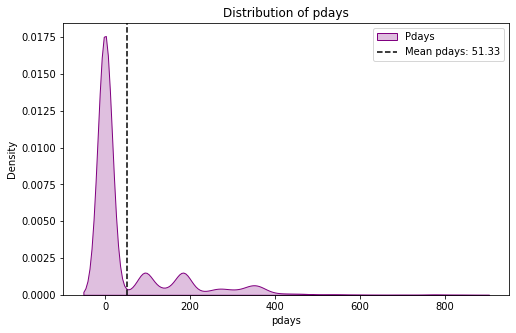

In [8]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['pdays'],shade=True,label='Pdays',color='purple')
plt.axvline(x=df['pdays'].mean(),color='k',linestyle ="--",label='Mean pdays: {}'.format(round(df['pdays'].mean(),2)))
plt.legend()
plt.title('Distribution of pdays')
plt.show()

In [9]:
fig=px.bar(df.job.value_counts().reset_index().rename(columns={'index':'Job','job':'Count'}),x='Job',y='Count',color='Job',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Job type of the Customers',font_family="Times New Roman",title_font_family="Times New Roman")


 - Management Job type Clients are maximum in the bank
 - There are very less number of student customers in the bank

In [10]:
import plotly.express as px

# Create a dataframe with counts of job types
job_counts = df.groupby(['job', 'deposit']).size().reset_index(name='count')

# Create the bar plot
fig = px.bar(job_counts, x='job', y='count', color='deposit', text='count', 
             template='simple_white', title='<b>Deposit Distribution by Job Type</b>')

# Update marker properties
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))

# Update layout properties
fig.update_layout(title_x=0.5, font_family="Times New Roman", title_font_family="Times New Roman")

fig.show()


In [11]:
fig=px.pie(df.marital.value_counts().reset_index().rename(columns={'index':'Marital-Status','marital':'Count'}),names='Marital-Status',values='Count',hole=0.5,template='plotly_white',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Marital-Status')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

In [12]:
import plotly.express as px

# Data for customers with deposits
deposits_yes = df[df['deposit'] == 'yes']
deposits_yes_counts = deposits_yes['marital'].value_counts().reset_index().rename(columns={'index':'Marital-Status', 'marital':'Count'})
deposits_yes_counts['Deposit'] = 'Yes'

# Data for customers without deposits
deposits_no = df[df['deposit'] == 'no']
deposits_no_counts = deposits_no['marital'].value_counts().reset_index().rename(columns={'index':'Marital-Status', 'marital':'Count'})
deposits_no_counts['Deposit'] = 'No'

# Combine the data
combined_data = deposits_yes_counts.append(deposits_no_counts)

# Create the donut chart
fig = px.sunburst(combined_data, path=['Deposit', 'Marital-Status'], values='Count',
                  color='Marital-Status', color_discrete_sequence=px.colors.qualitative.Set3,
                  title='<b>Marital Status Distribution by Deposit</b>',
                  template='plotly_white', width=800, height=500)

# Update layout
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(title_x=0.5)

fig.show()




   - Most of the clients in the bank are Married - 56.9% and Single - 31.5%

In [13]:
fig=px.bar(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),x='Education',y='Count',color='Education',text='Count',template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,legend_title_text='<b>Education',title_text='<b>Education of the customers',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()


In [14]:
fig=px.pie(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),names='Education',values='Count',hole=0.5,template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Education')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

In [15]:
import plotly.express as px

# Countthe number of customers for each education level and deposit status
education_deposit_counts = df.groupby(['education', 'deposit']).size().reset_index(name='count')

# Create the grouped bar plot
fig = px.bar(education_deposit_counts, x='education', y='count', color='deposit', barmode='group',
             text='count', template='plotly_white',
             title='<b>Deposit Distribution by Education Level</b>',
             labels={'education': 'Education', 'count': 'Count', 'deposit': 'Deposit'},
             color_discrete_sequence=px.colors.qualitative.Set2)

# Update marker properties
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))

# Update layout
fig.update_layout(title_x=0.5, legend_title_text='<b>Deposit', font_family="Times New Roman", title_font_family="Times New Roman")

fig.show()


In [16]:
import plotly.express as px

# Count the number of customers for each combination of job and education
job_education_counts = df.groupby(['job', 'education']).size().reset_index(name='count')

# Create the stacked bar plot
fig = px.bar(job_education_counts, x='job', y='count', color='education', barmode='stack',
             text='count', template='plotly_white',
             title='<b>Relationship between Job and Education</b>',
             labels={'job': 'Job', 'count': 'Count', 'education': 'Education'})

# Update marker properties
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))

# Update layout
fig.update_layout(title_x=0.5, legend_title_text='<b>Education')

fig.show()



   - Most of the customers in the bank are related to Secondary - 49.1%and < Tertiary - 33% Category
   - only 13.4% of the clients are related toprimary education category

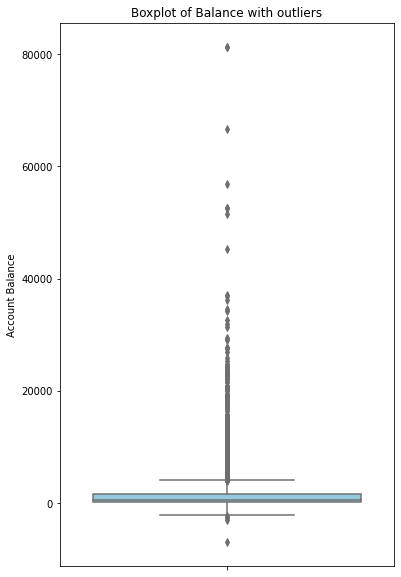

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 10))  # Adjust figure size as needed

# Create the vertical boxplot
sns.boxplot(y='balance', data=df, color='skyblue')

# Add title and labels
plt.title('Boxplot of Balance with outliers')
plt.xlabel('')
plt.ylabel('Account Balance')

plt.show()


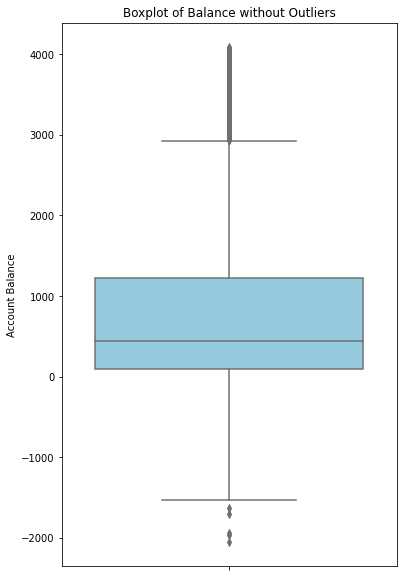

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the first and third quartiles
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_no_outliers = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

plt.figure(figsize=(6, 10))

# Create the vertical boxplot without outliers
sns.boxplot(y='balance', data=df_no_outliers, color='skyblue')

# Add title and labels
plt.title('Boxplot of Balance without Outliers')
plt.xlabel('')
plt.ylabel('Account Balance')

plt.show()


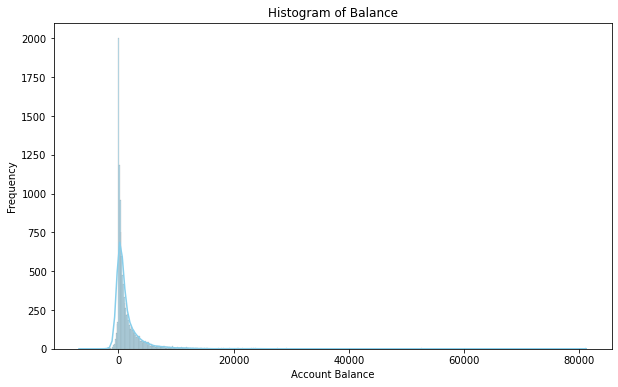

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(df['balance'], color='skyblue', kde=True)

# Add title and labels
plt.title('Histogram of Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')

plt.show()


In [20]:
fig=go.Figure()
from plotly.subplots import make_subplots
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Credit in Default', 'Housing Loan','Personal Loan'))
fig.add_trace(go.Pie(values=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Count'],labels=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Default'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Has Credit in Default?',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Count'],labels=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Housing'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Housing Loan',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Count'],labels=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Loan'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Personal Loan',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text=" ",title_text='<b style="color:black; font-size:100%;">Credit and Loan Analysis',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))


   -98.3%customers in the bank doesn't have  Credit in Default
   
   -52.7% customers in the bank doesn't have  Housing Loan
   
   -86.7% customers in the bank doesn't have Personal Loan

   -on comparing with Personal Loan and Housing Loan , Most of the clients subscribed forHousing Loan - 47.3%

In [21]:
fig=px.pie(df.contact.value_counts().reset_index().rename(columns={'index':'Contact','contact':'Count'}),names='Contact',values='Count',hole=0.5,template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Contact')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()


   - Most of the customers in the bank are contacted through  Cellular - 72%
   - only 6.93% of the clients are contacted through telephone

In [22]:
fig=px.bar(df.month.value_counts().reset_index().rename(columns={'index':'Month','month':'Count'}),x='Month',y='Count',color='Month',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Last Contact Month of the year',font_family="Times New Roman",title_font_family="Times New Roman")


   - Most of the clients in the bank are contacted in the months of   May, Jun, Juland in Aug last year.
   - very few of the clients are contacted in the months of Sep, Marand in Dec

In [23]:
import plotly.express as px

# Grouping data by month and deposit, and getting counts
deposit_month_counts = df.groupby(['month', 'deposit']).size().reset_index(name='count')

# Creating the bar plot
fig = px.bar(deposit_month_counts, x='month', y='count', color='deposit', barmode='group',
             title='Deposit Counts by Month',
             labels={'month': 'Month', 'count': 'Count', 'deposit': 'Deposit'},
             color_discrete_sequence=['MediumPurple','YellowGreen'])

# Show the plot
fig.show()


In [24]:
fig=px.bar(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),x='Poutcome',y='Count',color='Poutcome',text='Count',color_discrete_sequence=['grey','red','green','blue'],template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()




   - From the Outcomes of the previous marketing Campaign most of the results are Unknown ~ 74.6% and Failure ~ 11% 
   - Success rate is very less ~ 9.6%
   - From the Analysis, on doing Marketing Campaigns there will be more Failure than Success

In [25]:
fig=px.pie(df.groupby(['deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),names='deposit',values='Count',template='ggplot2',hole=0.8)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Deposit')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,title_text='<b>Term Deposits',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:

   - From the Outcomes of the previous marketing Campaign 52.6% of the Clients are not subsribed for the Term Deposits.</b>
   - only 47.4%  are subsribed to the term deposits

In [26]:
a=df.groupby(['job'],as_index=False)['balance'].mean()
a['balance']=round(a['balance'],1)
fig=px.bar(a.sort_values(by='balance',ascending=False),x='job',y='balance',text='balance',color='job',template='ggplot2')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Average balance of the clients by their job type',legend_title_text='Job Type',font_family="Times New Roman",title_font_family="Times New Roman")

In [27]:
fig=px.box(df,x='marital',y='age',color='marital',template='simple_white',title='<b>Distribution of age based on Marital Status',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Marital Status")
fig.show()


   - The median age of the married people is 43 and for the divorced people is 46.
   - The median age of the people who are single is 31

In [28]:
fig=px.box(df,x='education',y='age',color='education',template='simple_white',title='<b>Distribution of age based on Education Level')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Education Level")
fig.show()


   - The median age of the primary education level of the clients is 47 and the secondary education level of the clients is 38.
   - The median age of the clients whose Education level is unknown is 45
   - The median age of the clients whose Education level Tertiary is 36

In [29]:
fig=px.box(df,x='housing',y='age',color='housing',template='simple_white',title='<b>Distribution of age based on Housin Loan Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Housing Loan")
fig.show()


   - The median age of the clients who subscribed for the housing loan is 37.
   - The median age of the clients who are not  subscribed for the housing loan is 41.

In [30]:
fig=px.box(df,x='loan',y='age',color='loan',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'],title='<b>Distribution of age based on Personal Loan Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Personal Loan")
fig.show()


   - The median age of the clients who subscribed and not subscribed for the personal loan is almost same.

In [31]:
fig=px.box(df,x='deposit',y='age',color='deposit',template='simple_white',color_discrete_sequence=['DeepSkyBlue','LightCoral'],title='<b>Distribution of age based on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()


   - The median age of the clients who subscribed and not subscribed for the term deposit is almost same.

In [32]:
fig=px.box(df,x='deposit',y='pdays',color='deposit',template='simple_white',color_discrete_sequence=['DeepSkyBlue','LightCoral'],title='<b>Distribution of pdays based on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

In [33]:
k=df.groupby(['housing','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig=go.Figure()
fig=make_subplots(rows=1,cols=2)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=k[k['housing']=='yes']['Count'],labels=k[k['housing']=='yes']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Having Housing Loan',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=k[k['housing']=='no']['Count'],labels=k[k['housing']=='no']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Not having Housing loan',showlegend=True),row=1,col=2)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b>Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Housing Loan',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.add_annotation(dict(x=0.15, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>Have a Loan</b>"))
fig.add_annotation(dict(x=0.83, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>No Loan</b>"))
fig.update_traces(textposition='outside', textinfo='percent+label')



- 57% of Clients those not having housing loan are subscribed for the term deposits and 36.6% of clients those  having housing loan are subscribed to  the term deposits.

In [34]:
k=df.groupby(['loan','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig=go.Figure()
fig=make_subplots(rows=1,cols=2)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=k[k['loan']=='yes']['Count'],labels=k[k['loan']=='yes']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Having Personal Loan',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=k[k['loan']=='no']['Count'],labels=k[k['loan']=='no']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Not having Personal loan',showlegend=True),row=1,col=2)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b>Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Personal Loan',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.add_annotation(dict(x=0.15, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>Have a Loan</b>"))
fig.add_annotation(dict(x=0.83, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>No Loan</b>"))
fig.update_traces(textposition='outside', textinfo='percent+label')


- 49.5 % of Clients those not having personal loan are subscribed for the term deposits and 33.22 % of clients those  having personal loan are subscribed to  the term deposits.

In [35]:
d=df.groupby(['marital','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig=go.Figure()
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Divorced', 'Married','Single'))

fig.add_trace(go.Pie(values=d[d['marital']=='divorced']['Count'],labels=d[d['marital']=='divorced']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Divorced',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=d[d['marital']=='married']['Count'],labels=d[d['marital']=='married']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Married',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=d[d['marital']=='single']['Count'],labels=d[d['marital']=='single']['deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Single',showlegend=True),row=1,col=3)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Marital Status',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_traces(textposition='inside', textinfo='percent')


 - Out of divorced Clients,  48.1% are subscribed  and  51.9% are not subscribed to the term deposits
 - Out ofmarried Clients, 43.4%are subscribed  and   56.6%  are not subscribed to the term deposits
 - Out of single Clients, 54.3% aresubscribed  and  45.7%  are <b style="color: Coral;">not subscribed to the term deposits

In [36]:
a=df.groupby(['job','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('job')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='job',y='Count',text='percent',color='deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Term Depositors based on Job Type</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()


 - Clients whose job types in retired ,student,unemployed and housemaid are subscribed more to term deposits